# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [39]:
#Import all the necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [5]:
df=pd.read_csv(r'C:\Users\RKRIS\Downloads\Diabetes.csv')

# Q2. Print 10 samples from the dataset

In [12]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
732,2,174,88,37,120,44.5,0.646,24,1
80,3,113,44,13,0,22.4,0.140,22,0
280,0,146,70,0,0,37.9,0.334,28,1
746,1,147,94,41,0,49.3,0.358,27,1
219,5,112,66,0,0,37.8,0.261,41,1
240,1,91,64,24,0,29.2,0.192,21,0
704,4,110,76,20,100,28.4,0.118,27,0
606,1,181,78,42,293,40.0,1.258,22,1
92,7,81,78,40,48,46.7,0.261,42,0
683,4,125,80,0,0,32.3,0.536,27,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [13]:
df.shape

(768, 9)

In [16]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [24]:
col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in col:
    df[i].replace(0,df[i].median(),inplace=True)

# Q5 Print the descriptive statistics of each & every column using describe() function

In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [30]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

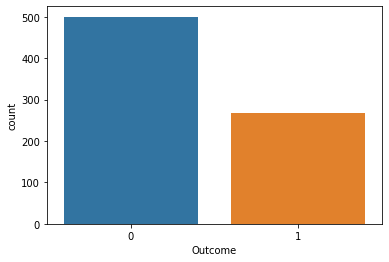

In [31]:
sns.countplot(x='Outcome', data=df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

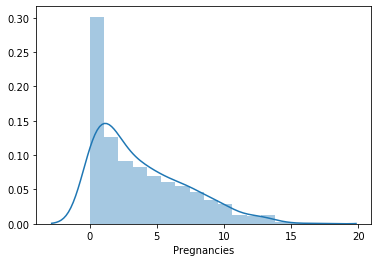

In [32]:
sns.distplot(df['Pregnancies'])

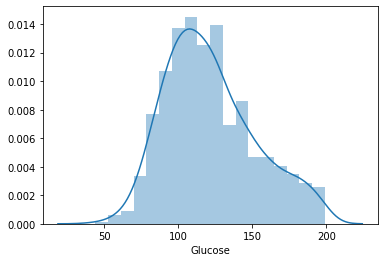

In [33]:
sns.distplot(df['Glucose'])

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


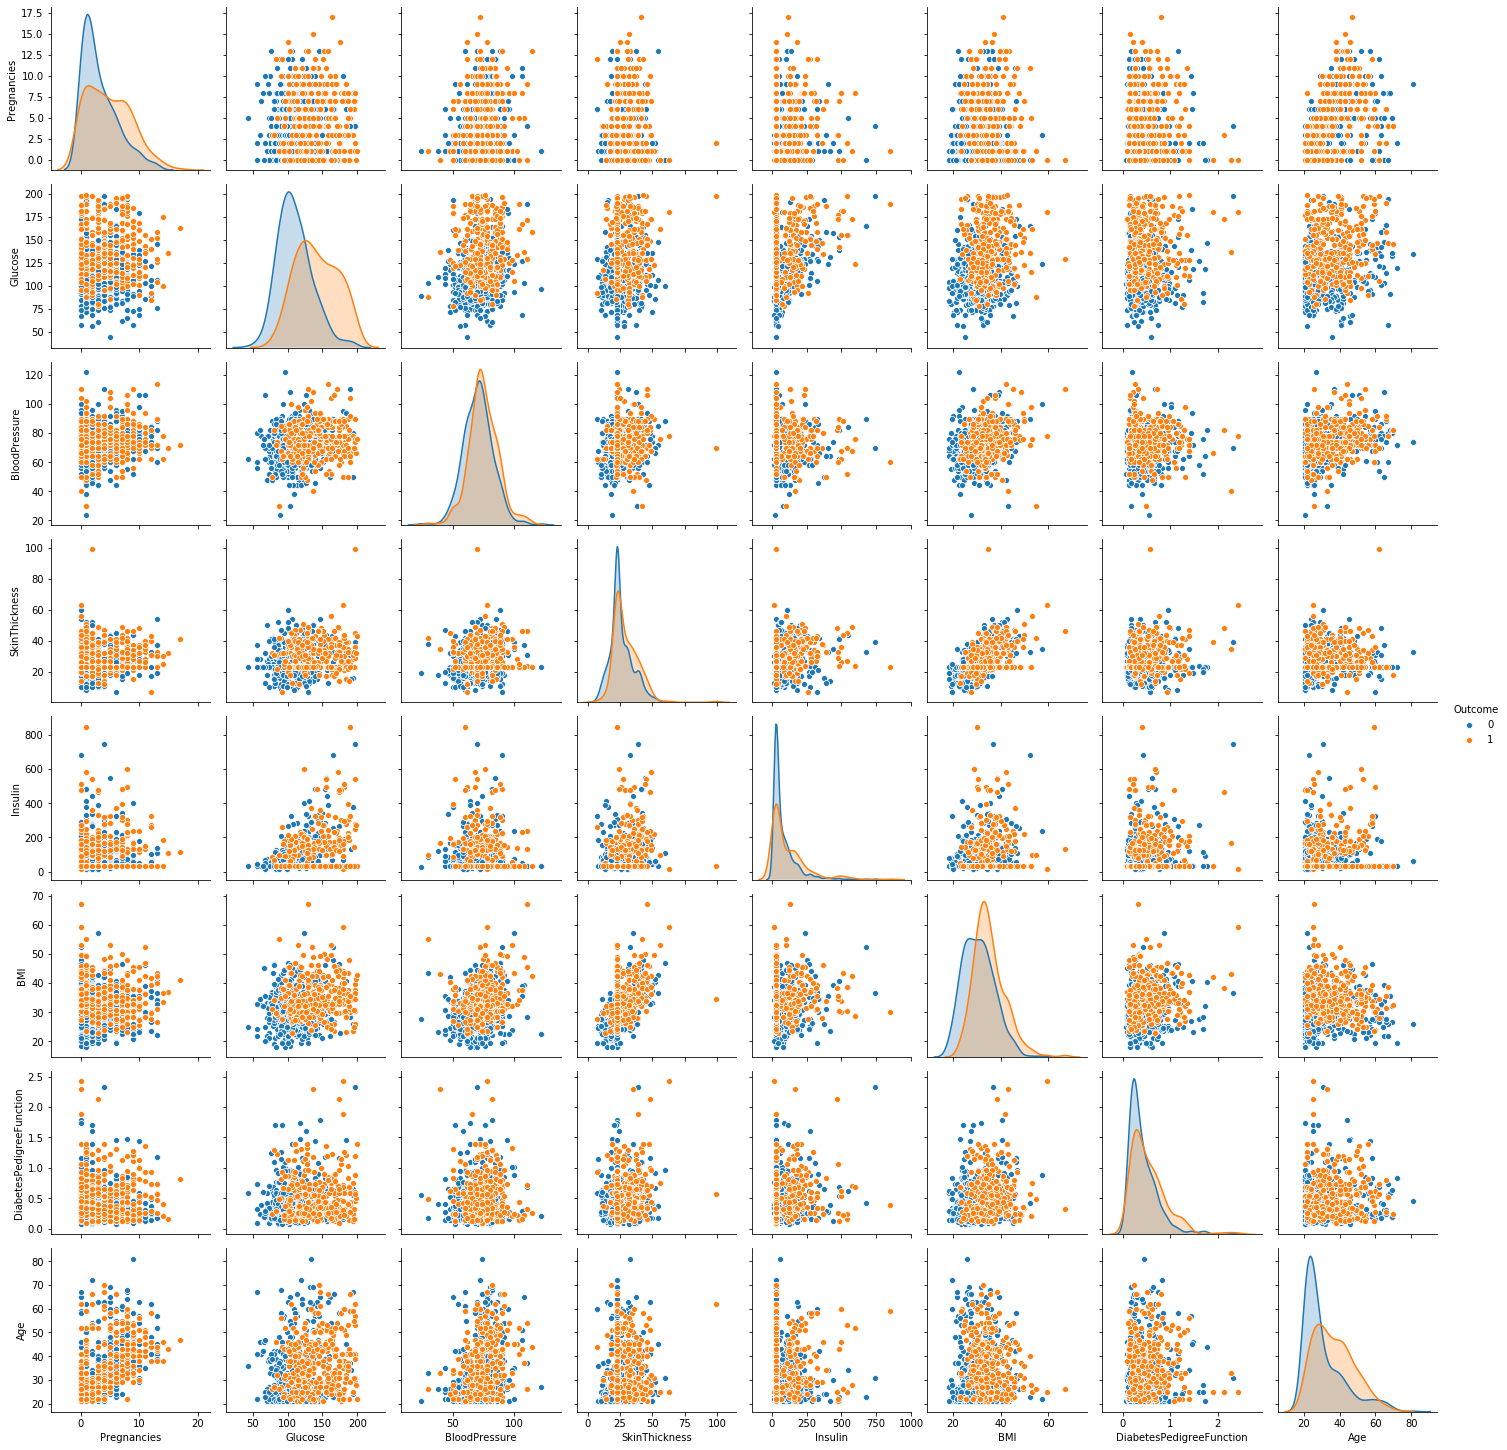

In [41]:
sns.pairplot(df,diag_kind='kde', hue='Outcome')

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [45]:
x=df.iloc[:,0:8]
y=df['Outcome']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

In [49]:
x_train.shape

(537, 8)

In [51]:
x_test.shape

(231, 8)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [59]:
from sklearn.metrics import accuracy_score

y_pred= dt.predict(x_test)
y_pred_train= dt.predict(x_train)

accuracy_score(y_test,y_pred)

0.7402597402597403

In [62]:
accuracy_score(y_train, y_pred_train)

1.0

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[123,  27],
       [ 33,  48]], dtype=int64)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [67]:
dt.feature_importances_

array([0.08794913, 0.30262582, 0.06273539, 0.0226361 , 0.04743249,
       0.17740441, 0.19182342, 0.10739324])

In [71]:
pd.DataFrame({'columns':df.columns[0:-1],'Imp_features':dt.feature_importances_}).sort_values(by='Imp_features', ascending=False)

,columns,Imp_features
1,Glucose,0.302626
6,DiabetesPedigreeFunction,0.191823
5,BMI,0.177404
7,Age,0.107393
0,Pregnancies,0.087949
2,BloodPressure,0.062735
4,Insulin,0.047432
3,SkinThickness,0.022636


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
rf=RandomForestClassifier(n_estimators=30,criterion='gini', max_depth= 9, min_samples_leaf=9, bootstrap=False)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
accuracy_score(y_train, rf.predict(x_train))

0.8919925512104283

In [83]:
accuracy_score(y_test, rf.predict(x_test))

0.7359307359307359

In [84]:
confusion_matrix(y_test, rf.predict(x_test))

array([[127,  23],
       [ 38,  43]], dtype=int64)

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [91]:
pred_ad=ad.predict(x_test)
accuracy_score(y_test, pred_ad )

0.7316017316017316

In [89]:
confusion_matrix(y_test, pred_ad)

array([[127,  23],
       [ 39,  42]], dtype=int64)

# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [93]:
from sklearn.ensemble import BaggingClassifier

In [94]:
bg= BaggingClassifier()
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [95]:
accuracy_score(y_test, bg.predict(x_test) )

0.7662337662337663

In [96]:
confusion_matrix(y_test, bg.predict(x_test) )

array([[133,  17],
       [ 37,  44]], dtype=int64)

# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [97]:
from sklearn.ensemble import GradientBoostingClassifier

In [98]:
gb = GradientBoostingClassifier()

In [99]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [100]:
accuracy_score(y_test, gb.predict(x_test) )

0.7489177489177489

In [101]:
confusion_matrix(y_test, gb.predict(x_test) )

array([[129,  21],
       [ 37,  44]], dtype=int64)